In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime = pd.read_csv("A.csv")

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [16]:
anime_rating = pd.read_csv('rating.csv')

In [17]:
anime_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [18]:
anime_rating.shape

(7813737, 3)

In [ ]:
# has 7813737 samples each consisting of 3 features.

In [51]:
#Finding count of Nan values in the dataset
anime.isna().sum()
#genre , type and rating have nan values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [20]:
#getting rid of duplicate values
anime_rating.drop_duplicates(keep='first',inplace=True)
anime.drop_duplicates(keep='first',inplace=True)

In [28]:
#getting rid of specific symbols and letter patterns in anime names
import re
for i in anime['name']:
  re.sub('&','and',i)
  re.sub('"', '', i)
  re.sub('.hack//', '', i)
  re.sub("A's", '', i)
  re.sub("'", '', i)
  re.sub("I'","I\'",i)

anime['name']

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12294, dtype: object

In [29]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [30]:
anime.describe().apply(lambda s: s.apply('{0:.2f}'.format))
# The anime dataset has the lowest anime rating of 1.67 and the highest rating of 10 with an average of 6.48. 
# This dataset also has the lowest number of anime community members 12 and the highest 1013917 with an average 
# of 18348. The difference between the min and max values of the number of anime community members is quite far 
# and this is natural because some anime are very popular and some are not.

,anime_id,rating,members
count,12294.00,12064.00,12294.00
mean,14058.22,6.47,18071.34
std,11455.29,1.03,54820.68
min,1.00,1.67,5.00
25%,3484.25,5.88,225.00
50%,10260.50,6.57,1550.00
75%,24794.50,7.18,9437.00
max,34527.00,10.00,1013917.00


In [31]:
anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))
#The anime rating dataset has the lowest rating given by the user to an anime is -1 and the highest 
#rating is 10. Note that a -1 rating indicates that the user watched the anime, but did not provide a rating.

,user_id,anime_id,rating
count,7813736.00,7813736.00,7813736.00
mean,36727.96,8909.07,6.14
std,20997.95,8883.95,3.73
min,1.00,1.00,-1.00
25%,18974.00,1240.00,6.00
50%,36791.00,6213.00,7.00
75%,54757.00,14093.00,9.00
max,73516.00,34519.00,10.00


In [32]:
#let us remove a -1 rating as it is of no use if the user has not provided a valid rating.
anime_rating = anime_rating[~(anime_rating.rating == -1)]

In [33]:
anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))
#min rating is now 1 instead of -1.

,user_id,anime_id,rating
count,6337240.00,6337240.00,6337240.00
mean,36747.91,8902.87,7.81
std,21013.40,8882.00,1.57
min,1.00,1.00,1.00
25%,18984.00,1239.00,7.00
50%,36815.00,6213.00,8.00
75%,54873.00,14075.00,9.00
max,73516.00,34475.00,10.00


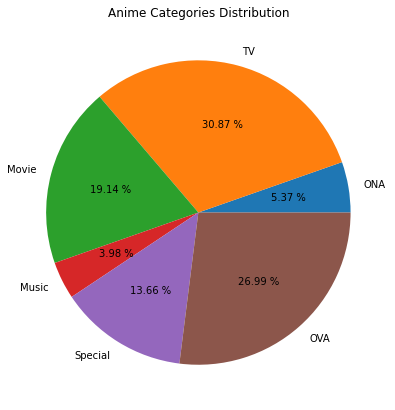

In [40]:
#some data visualization to better understand the dataset :)
labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']

plt.figure(figsize = (10,7))
plt.title('Anime Categories Distribution')
plt.pie([anime.loc[anime['type'] == 'ONA'].count()[0], anime.loc[anime['type'] == 'TV'].count()[0], anime.loc[anime['type'] == 'Movie'].count()[0], anime.loc[anime['type'] == 'Music'].count()[0], anime.loc[anime['type'] == 'Special'].count()[0], anime.loc[anime['type'] == 'OVA'].count()[0]],
        labels = labels,
        autopct = '%.2f %%'
        )
        
plt.show()

In [ ]:
# episode based anime (as expected) constitutes major percentage of the total collection followed by OVAs or specials

In [43]:
#top10 anime based upon number of community members. Deathnote is in the first place with 1013917 members
top10 = anime[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
top10

,name,members
40,Death Note,1013917
86,Shingeki no Kyojin,896229
804,Sword Art Online,893100
1,Fullmetal Alchemist: Brotherhood,793665
159,Angel Beats!,717796
19,Code Geass: Hangyaku no Lelouch,715151
841,Naruto,683297
3,Steins;Gate,673572
445,Mirai Nikki (TV),657190
131,Toradora!,633817


In [45]:
# Top 10 Anime Based on Avg Ratings
anime.sort_values(by='rating', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [48]:
anime['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12294, dtype: object

In [58]:
# Content Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_matrix = tf.fit_transform(anime['genre'])

ValueError: ignored

In [59]:
#since the traceback expects us to provide a unicode string, we do so
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(anime['genre'].values.astype('U'))
tfidf_matrix = tf.fit_transform(anime['genre'].values.astype('U'))

In [60]:
tfidf_matrix.shape

(12294, 48)

In [64]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29464923, 0.31760665, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25063144, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [67]:
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'nan', 'of',
       'parody', 'police', 'power', 'psychological', 'romance', 'samurai',
       'school', 'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space',
       'sports', 'super', 'supernatural', 'thriller', 'vampire', 'yaoi',
       'yuri'], dtype=object)

In [69]:
mat = pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(),index=anime.name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
mat
#This dataframe shows the tf-idf matrix for several anime and genres. The higher the matrix value, 
#the higher the relationship between anime and the genre. For example the anime kimi no Na wa  
#is a predominantly drama and supernatural genre as seen from the matrix values obtained by the anime in the these genres.
#whereas Fullmetal alchemist has positive values for action,adventure,drama,shounen,etc

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,shounen,slice,space,sports,super,supernatural,thriller,vampire,yaoi,yuri
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.440247,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.544416,0.000000,0.0,0.0,0.0
Fullmetal Alchemist: Brotherhood,0.294649,0.317607,0.0,0.0,0.0,0.000000,0.0,0.0,0.335834,0.0,...,0.350987,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Gintama°,0.250631,0.000000,0.0,0.0,0.0,0.200766,0.0,0.0,0.000000,0.0,...,0.298553,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Steins;Gate,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.833769,0.0,0.0,0.0
Gintama&#039;,0.250631,0.000000,0.0,0.0,0.0,0.200766,0.0,0.0,0.000000,0.0,...,0.298553,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Under World,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Violence Gekiga David no Hoshi,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [71]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculating cosine similarity on the tf-idf matrix
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14784981, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14784981, 1.        , 0.1786367 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1786367 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [73]:
# Create a dataframe from the cosine_sim variable with rows and columns in the form of anime names
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['name'], columns=anime['name'])
cosine_sim_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Super Erotic Anime,Taimanin Asagi 3,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.00000,0.147850,0.000000,0.000000,0.000000,0.424993,0.000000,0.156525,0.000000,0.000000,...,0.0,0.279214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fullmetal Alchemist: Brotherhood,0.14785,1.000000,0.178637,0.000000,0.178637,0.283869,0.340560,0.407375,0.178637,0.178637,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama°,0.00000,0.178637,1.000000,0.220949,1.000000,0.183059,0.195689,0.199324,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Steins;Gate,0.00000,0.000000,0.220949,1.000000,0.220949,0.000000,0.000000,0.274995,0.220949,0.220949,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama&#039;,0.00000,0.178637,1.000000,0.220949,1.000000,0.183059,0.195689,0.199324,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.498764,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Under World,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.498764,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Violence Gekiga David no Hoshi,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.498764,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [78]:
#The anime_recommendations function is created to find anime recommendations using the previously defined 
#similarity. This function works by taking the anime with the greatest similarity from the existing index.
def recc(name, similarity_data=cosine_sim_df, items=anime[['name', 'genre']], k=10):
    # Retrieve data using argpartition to partition indirectly along a given axis
    index = similarity_data.loc[:,name].to_numpy().argpartition(range(-1, -k, -1))# Dataframe changed to numpy
    
    # here , we retrieve data with the greatest similarity from the existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    # Drop name so that the name of the anime you are looking for does not appear in the list of recommendations
    closest = closest.drop(name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [79]:
recc('Death Note')
#final output of recommended anime (in this case reccs to Death Note)

,name,genre
0,Death Note Rewrite,"Mystery, Police, Psychological, Supernatural, ..."
1,Mousou Dairinin,"Drama, Mystery, Police, Psychological, Superna..."
2,Higurashi no Naku Koro ni Kai,"Mystery, Psychological, Supernatural, Thriller"
3,Higurashi no Naku Koro ni Rei,"Comedy, Mystery, Psychological, Supernatural, ..."
4,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super..."
5,Mirai Nikki (TV): Ura Mirai Nikki,"Action, Comedy, Mystery, Psychological, Shoune..."
6,Higurashi no Naku Koro ni,"Horror, Mystery, Psychological, Supernatural, ..."
7,Monster,"Drama, Horror, Mystery, Police, Psychological,..."
8,Higurashi no Naku Koro ni Kaku: Outbreak,"Horror, Mystery, Psychological, Thriller"
9,Zankyou no Terror,"Psychological, Thriller"


In [114]:
#finally, i tried writing a streamlit app for the same, but ended up with some error, will work on it soon.
%%writefile animerec.py 
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import re

anime = pd.read_csv("A.csv")
anime_rating = pd.read_csv('rating.csv')

anime_rating.drop_duplicates(keep='first',inplace=True)
anime.drop_duplicates(keep='first',inplace=True)

for i in anime['name']:
  re.sub('&','and',i)
  re.sub('"', '', i)
  re.sub('.hack//', '', i)
  re.sub("A's", '', i)
  re.sub("'", '', i)
  re.sub("I'","I\'",i)

anime_rating = anime_rating[~(anime_rating.rating == -1)]

tf = TfidfVectorizer()
tf.fit(anime['genre'].values.astype('U'))
tfidf_matrix = tf.fit_transform(anime['genre'].values.astype('U'))


mat = pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(),index=anime.name)

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix) 

cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['name'], columns=anime['name'])

def recc(name, k, similarity_data=cosine_sim_df, items=anime[['name', 'genre']]):
    index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)


st.title("Get Recommendations for an Anime")
ip = st.text_input("Enter the Anime name here")
ip2 = st.number_input("enter number of recommendations required")
op = recc(ip,int(ip2))
st.title(op)


Overwriting animerec.py


In [ ]:
!streamlit run animerec.py & npx localtunnel --port 8501